# Lista 8

## Ćwiczenie 14

#### Dla danych $dane.csv$ skonstruować drzewo klasyfikacyjne, gdzie liśćmi będą miejsca hospitalizacji, natomiast węzłami płeć, wiek oraz poziom hemoglobiny. Następnie wykonać następujące polecenia.

In [1]:
# wczytanie danych
pacjenci = read.table("dane.csv", sep = ";", header = TRUE)

In [2]:
# ukazanie wartosci w zmiennej City
table(pacjenci$City)


 Gda\xf1sk   Warszawa Wroc\xb3aw 
       498        155        207 

In [3]:
# zmiana wartosci w zmiennej City na wartosci bez polskich znakow
pacjenci$City[pacjenci$City == "Wroc\xb3aw"] = "Wroclaw"
pacjenci$City[pacjenci$City == "Gda\xf1sk"] = "Gdansk"

Wartości $Wrocław$ oraz $Gdańsk$ w zmiennej dotyczącej miasta zawierają polskie znaki, które nie są uwzględniane przy wczytywaniu tabeli i prowadzą do wypisania błędów. Celem ich uniknięcia zmieniliśmy nazwy miast na nazwy bez polskich znaków.

In [4]:
# wyswietlenie pierwszych 6 wierszy danych
head(pacjenci)

,YOB,Height,Weight,Sex,Hemoglobin,VitB12,Creatinine,City,Sex2,BMI,Nadwaga,VitB12_log,Creatinine_log,Wiek
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1927,166,66,F,12.87,271,1.43,Wroclaw,0,23.95,0,5.60,0.89,86
2,1925,156,67,F,14.49,322,1.14,Wroclaw,0,27.53,0,5.77,0.76,88
3,1940,173,92,M,13.36,304,1.13,Wroclaw,1,30.74,1,5.72,0.76,73
4,1922,172,72,M,13.84,511,1.42,Wroclaw,1,24.34,0,6.24,0.88,91
5,1924,157,62,F,14.52,668,1.32,Wroclaw,0,25.15,0,6.50,0.84,89
6,1942,169,95,M,11.13,269,1.81,Wroclaw,1,33.26,1,5.59,1.03,71


In [5]:
# zmiana typu kolumny City na typ factor
pacjenci$City = as.factor(pacjenci$City)
# wyswietlenie pierwszych 6 wierszy danych
head(pacjenci)

,YOB,Height,Weight,Sex,Hemoglobin,VitB12,Creatinine,City,Sex2,BMI,Nadwaga,VitB12_log,Creatinine_log,Wiek
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1927,166,66,F,12.87,271,1.43,Wroclaw,0,23.95,0,5.60,0.89,86
2,1925,156,67,F,14.49,322,1.14,Wroclaw,0,27.53,0,5.77,0.76,88
3,1940,173,92,M,13.36,304,1.13,Wroclaw,1,30.74,1,5.72,0.76,73
4,1922,172,72,M,13.84,511,1.42,Wroclaw,1,24.34,0,6.24,0.88,91
5,1924,157,62,F,14.52,668,1.32,Wroclaw,0,25.15,0,6.50,0.84,89
6,1942,169,95,M,11.13,269,1.81,Wroclaw,1,33.26,1,5.59,1.03,71


In [6]:
# wczytanie paczek
library(rpart)
library(repr)

In [7]:
# zmiana wielkosci wykresow
options(repr.plot.width = 30, repr.plot.height = 15)

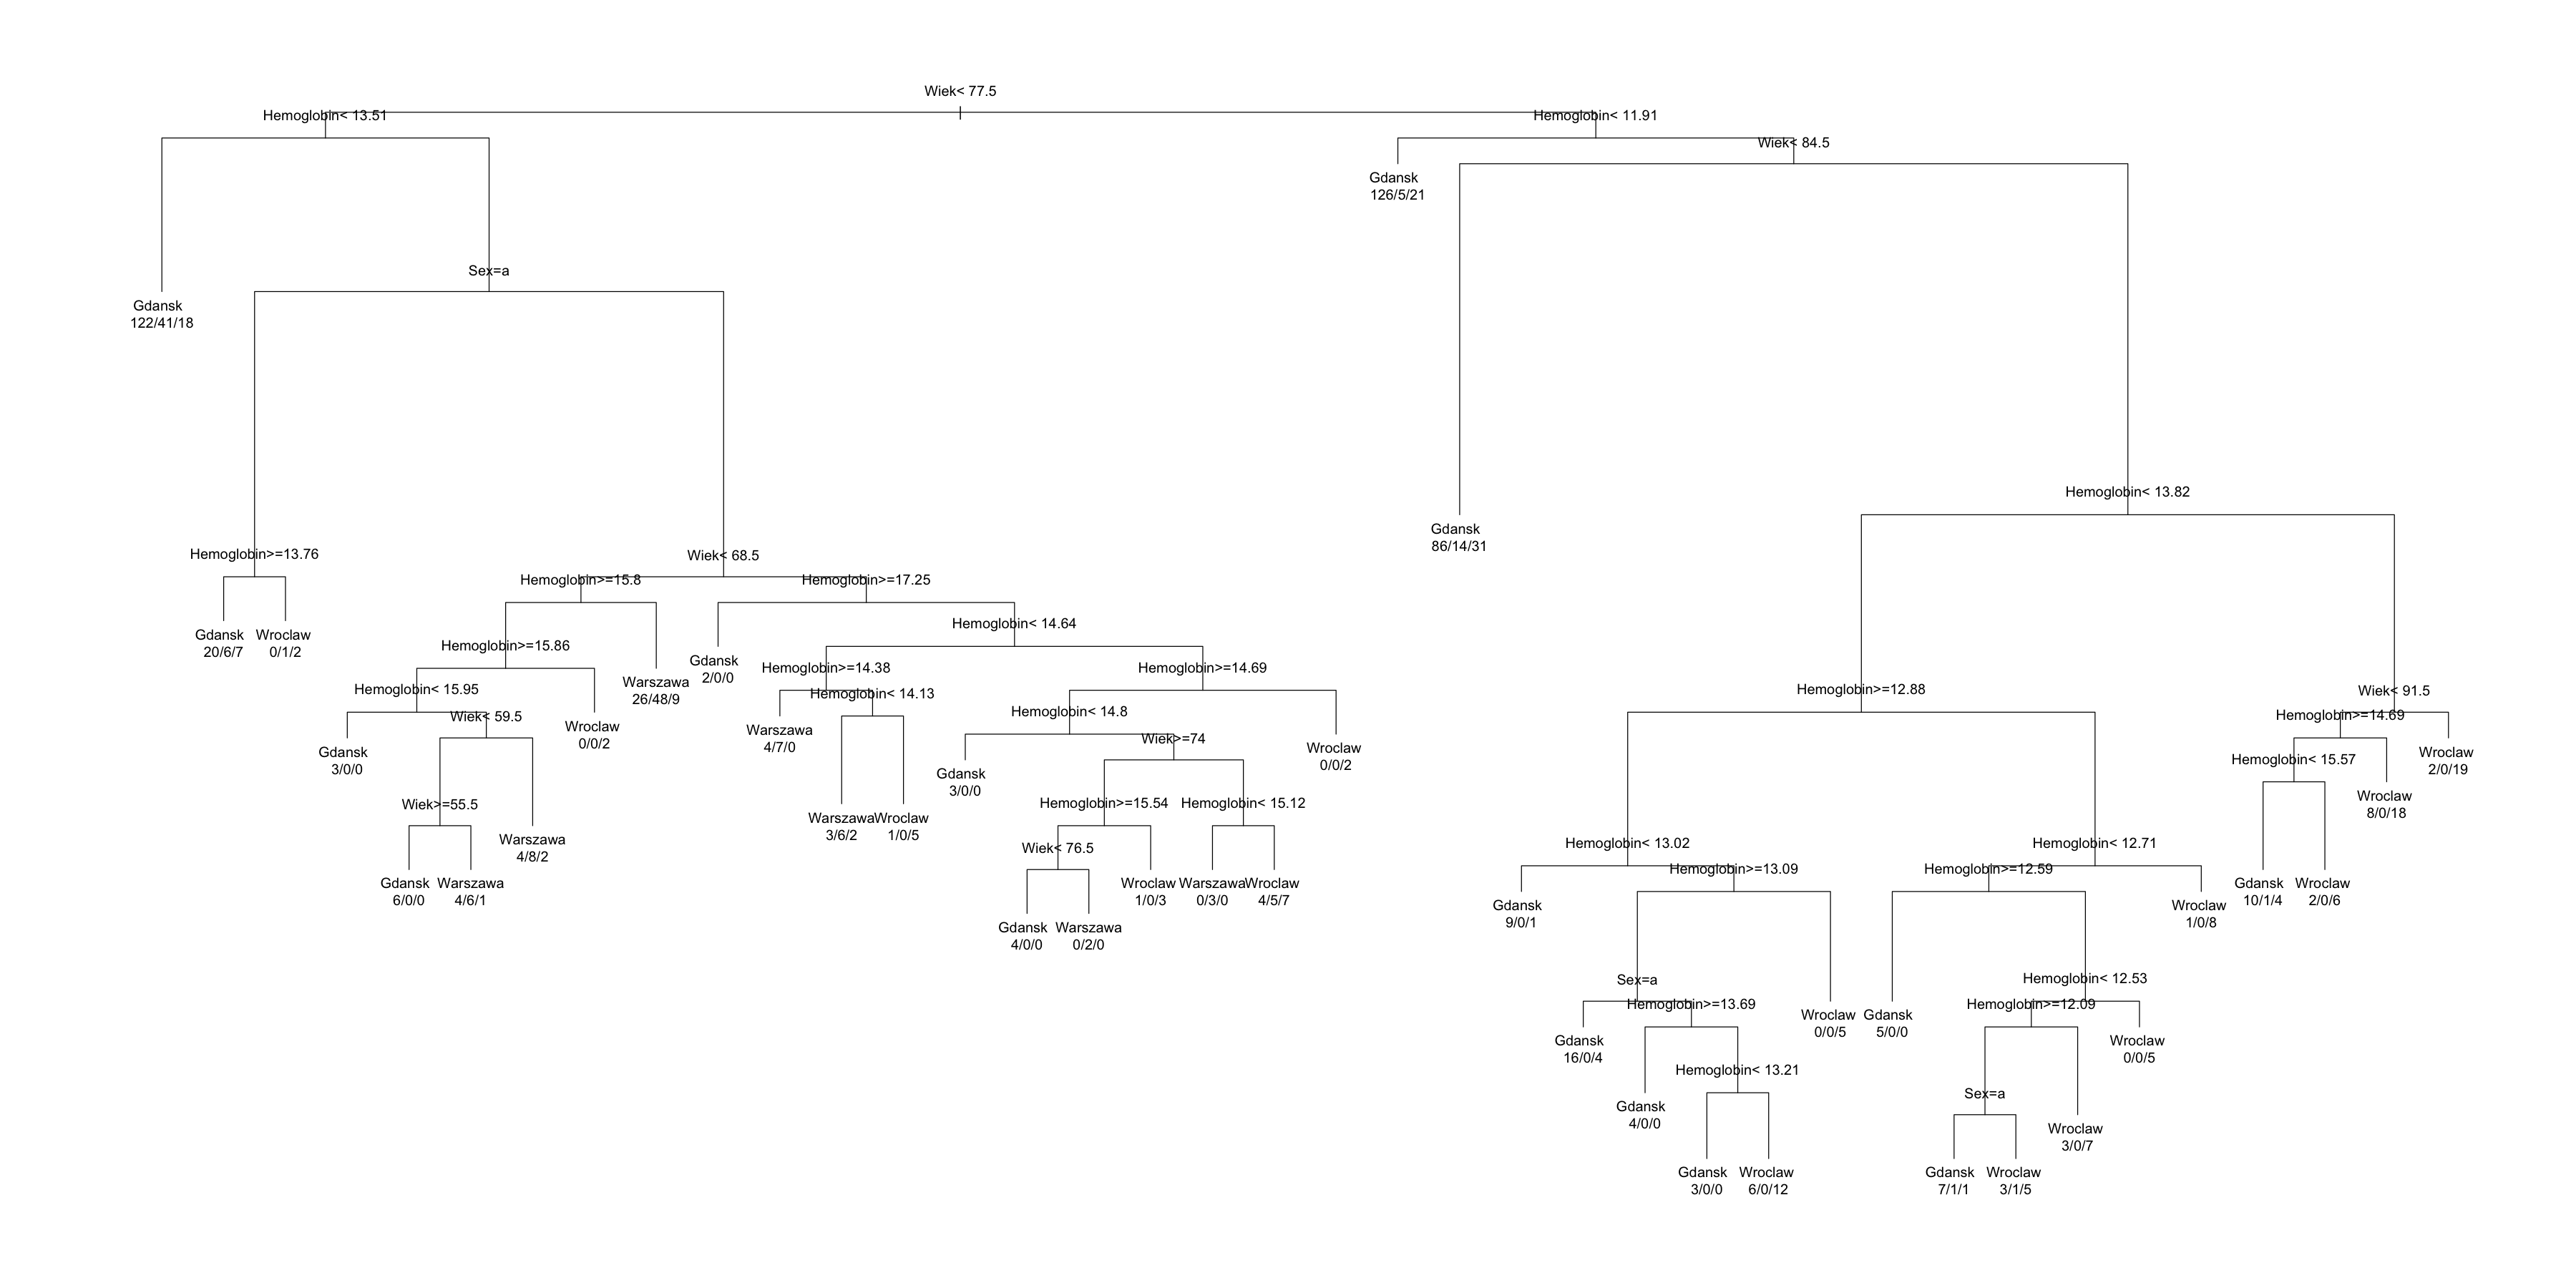

In [8]:
# stworzenie drzewa klasyfikacyjnego zaleznosci zmiennej City od zmiennych Sex, Wiek oraz Hemoglobin
drzewo_14_1 = rpart(City ~ Sex + Wiek + Hemoglobin, data = pacjenci, cp = 0.005, minsplit = 5)
# narysowanie drzewa klasyfikacyjnego
plot(drzewo_14_1)
# dodanie tekstu do drzewa klasyfikacyjnego
text(drzewo_14_1, use.n = TRUE)

Współczynnik złożoności drzewa został dobrany tak, aby odpowiadał drzewu w punkcie $d)$.

#### a) Wybrać optymalną wartość współczynnika złożoności i wyznaczyć ponownie drzewo dla uzyskanej wartości współczynnika złożoności.

In [9]:
# zmiana wielkosci wykresow
options(repr.plot.width = 10, repr.plot.height = 10)

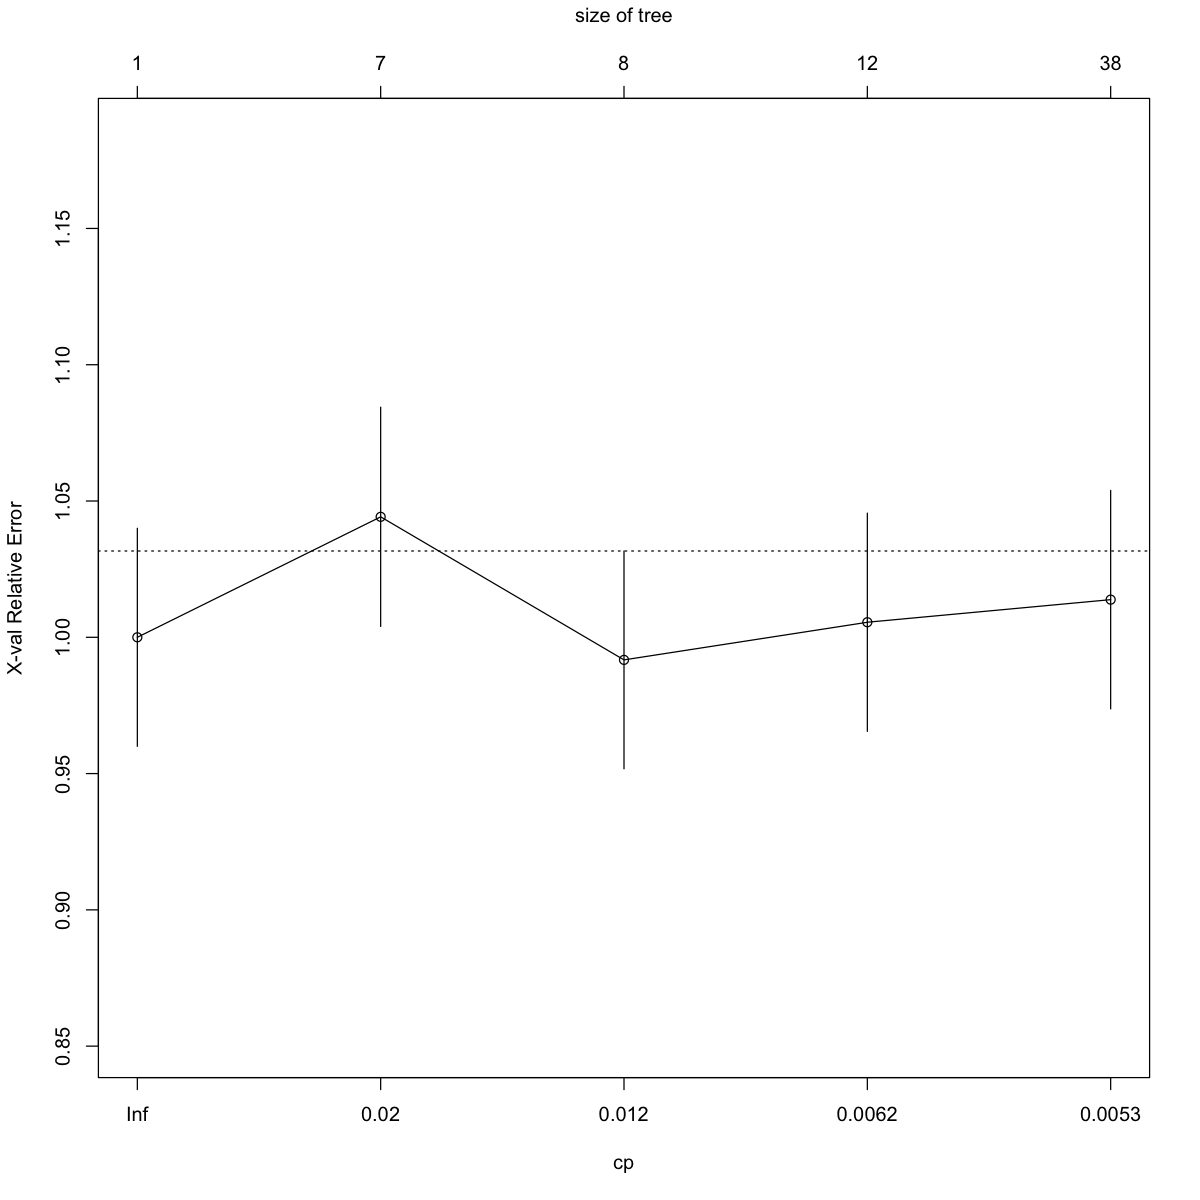

In [10]:
# wykres dla wspolczynnika zlozonosci
plotcp(drzewo_14_1)

Optymalna wartość współczynnika złożoności wynosi 0.012.

In [11]:
# zmiana wielkosci wykresow
options(repr.plot.width = 10, repr.plot.height = 12)

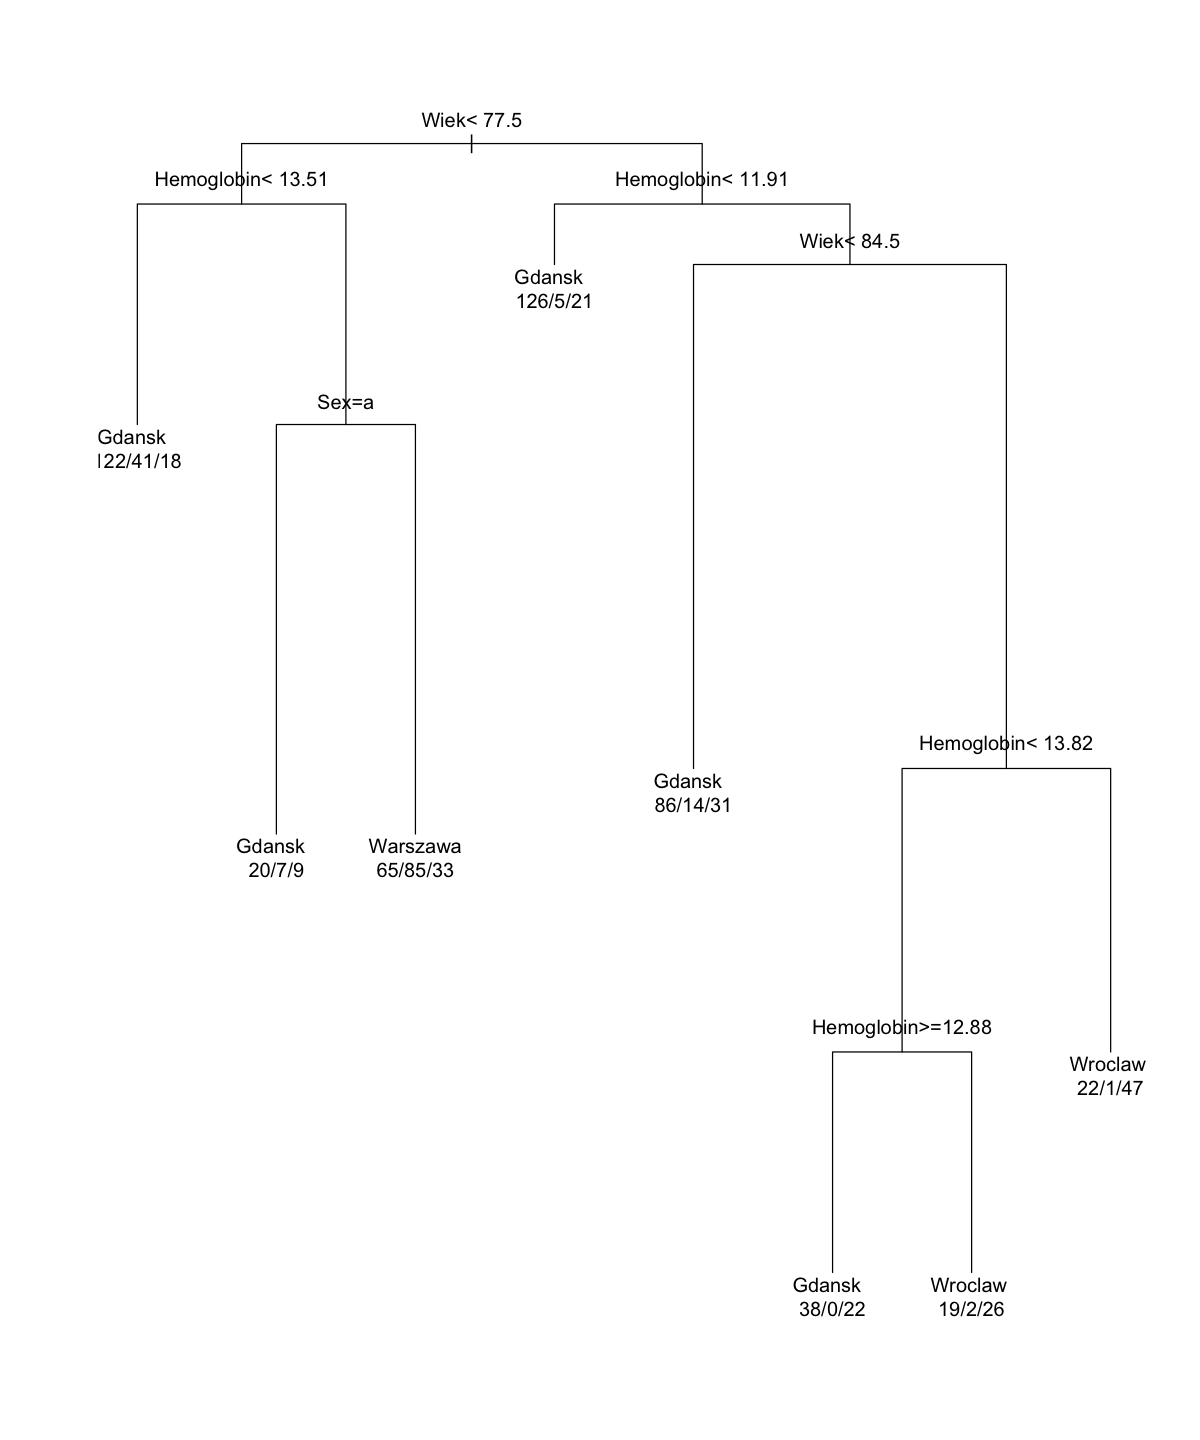

In [12]:
# obciecie stworzonego wczesniej drzewa klasyfikacyjnego do drzewa ze zmieniona wartoscia wspolczynnika zlozonosci
drzewo_14_2 = prune.rpart(drzewo_14_1, cp = 0.012)
# narysowanie drzewa
plot(drzewo_14_2)
# dodanie tekstu do drzewa
text(drzewo_14_2, use.n = TRUE)

#### b) Wybrać drzewo optymalne przy pomocy metody kroswalidacji.

In [13]:
# liczba obserwacji w zbiorze danych
liczba_obserwacji_14 = nrow(pacjenci)
liczba_obserwacji_14

[1] 860

In [14]:
# stworzenie pustych wektorow do uzupelnienia
poprawnosc_kroswalidacja_14_1 = rep(0, liczba_obserwacji_14)
poprawnosc_kroswalidacja_14_2 = rep(0, liczba_obserwacji_14)

In [15]:
# sprawdzenie metody kroswalidacji dla wartosci wspolczynnika zlozonosci 0.005
for (i in 1:liczba_obserwacji_14){
# za kazdym powtorzeniem petli bierzemy dane bez jednej obserwacji
    pacjenci_kroswalidacja_1 = pacjenci[-i, ]
# okreslenie wyrzuconej obserwacji
    pacjenci_obserwacja_1 = pacjenci[i, ]
# stworzenie drzewa na podstawie metody kroswalidacji dla wyznaczonej wartosci wspolczynnika zlozonosci
    drzewo_kroswalidacja_14_1 = rpart(City ~ Sex + Wiek + Hemoglobin, data = pacjenci, cp = 0.012, minsplit = 5)
# predykcja klasy wyrzuconej obserwacji na podstawie stworzonego drzewa
    predykcja_kroswalidacja_14_1 = predict(drzewo_kroswalidacja_14_1, newdata = pacjenci_obserwacja_1, type = "class")
# jezeli predykcja nie jest identyczna jak oryginalna wartosc, to do wektora wpisujemy 1
    if (predykcja_kroswalidacja_14_1 != pacjenci_obserwacja_1$City){
        poprawnosc_kroswalidacja_14_1[i] = 1
    }
}

In [16]:
# sprawdzenie metody kroswalidacji dla wartosci wspolczynnika zlozonosci 0.012
for (i in 1:liczba_obserwacji_14){
# za kazdym powtorzeniem petli bierzemy dane bez jednej obserwacji
    pacjenci_kroswalidacja_2 = pacjenci[-i, ]
# okreslenie wyrzuconej obserwacji
    pacjenci_obserwacja_2 = pacjenci[i, ]
# stworzenie drzewa na podstawie metody kroswalidacji dla wyznaczonej wartosci wspolczynnika zlozonosci
    drzewo_kroswalidacja_14_2 = rpart(City ~ Sex + Wiek + Hemoglobin, data = pacjenci, cp = 0.012, minsplit = 5)
# predykcja klasy wyrzuconej obserwacji na podstawie stworzonego drzewa
    predykcja_kroswalidacja_14_2 = predict(drzewo_kroswalidacja_14_2, newdata = pacjenci_obserwacja_2, type = "class")
# jezeli predykcja nie jest identyczna jak oryginalna wartosc, to do wektora wpisujemy 1
    if (predykcja_kroswalidacja_14_2 != pacjenci_obserwacja_2$City){
        poprawnosc_kroswalidacja_14_2[i] = 1
    }
}

In [17]:
# wypisanie utworzonych wektorow
poprawnosc_kroswalidacja_14_1
poprawnosc_kroswalidacja_14_2

[1] 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1
 [38] 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 [75] 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0
[112] 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0
[149] 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
[186] 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1
[223] 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0
[260] 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0
[297] 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
[334] 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1
[371] 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0
[408] 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0
[445] 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
[482] 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
[519] 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
[556] 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0
[593] 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
[667] 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
[778] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1
[815] 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
[852] 1 0 0 0 0 1 0 0 0

[1] 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1
 [38] 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 [75] 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0
[112] 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0
[149] 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
[186] 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1
[223] 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0
[260] 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0
[297] 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
[334] 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1
[371] 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0
[408] 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0
[445] 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
[482] 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
[519] 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
[556] 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0
[593] 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
[667] 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
[778] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1
[815] 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
[852] 1 0 0 0 0 1 0 0 0

#### c) Oszacować ułamek poprawnych klasyfikacji oraz błąd klasyfikacji na podstawie kroswalidacji.

In [18]:
# blad klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.005
blad_predykcji_drzewo_kroswalidacja_14_1 = sum(poprawnosc_kroswalidacja_14_1) / liczba_obserwacji_14 * 100
blad_predykcji_drzewo_kroswalidacja_14_1

[1] 36.04651

In [19]:
# blad klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.012
blad_predykcji_drzewo_kroswalidacja_14_2 = sum(poprawnosc_kroswalidacja_14_2) / liczba_obserwacji_14 * 100
blad_predykcji_drzewo_kroswalidacja_14_2

[1] 36.04651

In [20]:
# procent poprawnych klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.005
poprawna_predykcja_drzewo_kroswalidacja_14_1 = 100 - blad_predykcji_drzewo_kroswalidacja_14_1
poprawna_predykcja_drzewo_kroswalidacja_14_1

[1] 63.95349

In [21]:
# procent poprawnych klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.012
poprawna_predykcja_drzewo_kroswalidacja_14_2 = 100 - blad_predykcji_drzewo_kroswalidacja_14_2
poprawna_predykcja_drzewo_kroswalidacja_14_2

[1] 63.95349

Błąd klasyfikacji dla obu drzew opartych o metodę kroswalidacji jest taki sam.

Błąd klasyfikacji dla drzew opartych o metodę kroswalidacji wynosi niewiele ponad 36%, prawie 64% obserwacji zostało zaklasyfikowanych poprawnie.

#### d) Porównać wartości z podpunktu $c)$ dla drzewa ze współczynnikiem złożoności = 0.005. Które drzewo jest lepsze?

In [22]:
# predykcje klas na podstawie drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005
predykcja_drzewo_14_1 = predict(drzewo_14_1, type = "class")
predykcja_drzewo_14_1

1        2        3        4        5        6        7        8 
 Wroclaw  Wroclaw   Gdansk  Wroclaw  Wroclaw   Gdansk   Gdansk Warszawa 
       9       10       11       12       13       14       15       16 
 Wroclaw   Gdansk   Gdansk  Wroclaw   Gdansk  Wroclaw   Gdansk  Wroclaw 
      17       18       19       20       21       22       23       24 
  Gdansk  Wroclaw   Gdansk  Wroclaw Warszawa  Wroclaw   Gdansk Warszawa 
      25       26       27       28       29       30       31       32 
 Wroclaw  Wroclaw   Gdansk  Wroclaw   Gdansk  Wroclaw   Gdansk  Wroclaw 
      33       34       35       36       37       38       39       40 
 Wroclaw   Gdansk   Gdansk  Wroclaw   Gdansk  Wroclaw   Gdansk  Wroclaw 
      41       42       43       44       45       46       47       48 
  Gdansk Warszawa   Gdansk  Wroclaw  Wroclaw   Gdansk  Wroclaw Warszawa 
      49       50       51       52       53       54       55       56 
  Gdansk  Wroclaw Warszawa   Gdansk  Wroclaw   Gdansk   Gdansk  Wroclaw 
      57       58       59       60       61       62       63       64 
 Wroclaw  Wroclaw   Gdansk  Wroclaw  Wroclaw  Wroclaw   Gdansk   Gdansk 
      65       66       67       68       69       70       71       72 
 Wroclaw   Gdansk   Gdansk   Gdansk   Gdansk  Wroclaw   Gdansk   Gdansk 
      73       74       75       76       77       78       79       80 
 Wroclaw   Gdansk  Wroclaw  Wroclaw  Wroclaw  Wroclaw  Wroclaw   Gdansk 
      81       82       83       84       85       86       87       88 
 Wroclaw   Gdansk  Wroclaw  Wroclaw  Wroclaw  Wroclaw   Gdansk  Wroclaw 
      89       90       91       92       93       94       95       96 
  Gdansk  Wroclaw  Wroclaw   Gdansk   Gdansk  Wroclaw  Wroclaw   Gdansk 
      97       98       99      100      101      102      103      104 
  Gdansk  Wroclaw  Wroclaw   Gdansk  Wroclaw   Gdansk  Wroclaw   Gdansk 
     105      106      107      108      109      110      111      112 
  Gdansk  Wroclaw  Wroclaw  Wroclaw  Wroclaw  Wroclaw  Wroclaw  Wroclaw 
     113      114      115      116      117      118      119      120 
 Wroclaw  Wroclaw   Gdansk  Wroclaw  Wroclaw Warszawa   Gdansk   Gdansk 
     121      122      123      124      125      126      127      128 
Warszawa Warszawa   Gdansk  Wroclaw   Gdansk  Wroclaw  Wroclaw  Wroclaw 
     129      130      131      132      133      134      135      136 
  Gdansk  Wroclaw   Gdansk  Wroclaw  Wroclaw  Wroclaw   Gdansk   Gdansk 
     137      138      139      140      141      142      143      144 
 Wroclaw   Gdansk  Wroclaw  Wroclaw  Wroclaw   Gdansk  Wroclaw  Wroclaw 
     145      146      147      148      149      150      151      152 
  Gdansk   Gdansk   Gdansk   Gdansk   Gdansk  Wroclaw  Wroclaw   Gdansk 
     153      154      155      156      157      158      159      160 
 Wroclaw   Gdansk  Wroclaw  Wroclaw   Gdansk  Wroclaw   Gdansk  Wroclaw 
     161      162      163      164      165      166      167      168 
 Wroclaw   Gdansk   Gdansk  Wroclaw  Wroclaw  Wroclaw  Wroclaw   Gdansk 
     169      170      171      172      173      174      175      176 
 Wroclaw   Gdansk   Gdansk  Wroclaw   Gdansk Warszawa   Gdansk   Gdansk 
     177      178      179      180      181      182      183      184 
  Gdansk  Wroclaw  Wroclaw   Gdansk Warszawa  Wroclaw   Gdansk Warszawa 
     185      186      187      188      189      190      191      192 
 Wroclaw  Wroclaw  Wroclaw  Wroclaw   Gdansk   Gdansk   Gdansk  Wroclaw 
     193      194      195      196      197      198      199      200 
 Wroclaw  Wroclaw  Wroclaw   Gdansk  Wroclaw   Gdansk   Gdansk   Gdansk 
     201      202      203      204      205      206      207      208 
 Wroclaw  Wroclaw   Gdansk   Gdansk Warszawa Warszawa   Gdansk   Gdansk 
     209      210      211      212      213      214      215      216 
Warszawa Warszawa Warszawa   Gdansk Warszawa  Wroclaw Warszawa Warszawa 
     217      218      219      220      221      222      223   

In [23]:
# tabela predykcji dla drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005
tabela_predykcji_drzewo_14_1 = table(True = pacjenci$City, Predicted = predykcja_drzewo_14_1)
tabela_predykcji_drzewo_14_1

          Predicted
True       Gdansk Warszawa Wroclaw
  Gdansk      426       41      31
  Warszawa     68       80       7
  Wroclaw      87       14     106

In [24]:
# blad predykcji dla drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005
blad_predykcji_drzewo_14_1 = (1 - (sum(diag(tabela_predykcji_drzewo_14_1))) / nrow(pacjenci)) * 100
blad_predykcji_drzewo_14_1

[1] 28.83721

In [25]:
# blad predykcji dla drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005 opartego o metode kroswalidacji
blad_predykcji_drzewo_kroswalidacja_14_2

[1] 36.04651

Błąd klasyfikacji dla drzewa opartego o metodę kroswalidacji jest o ponad 7% większy niż dla drzewa klasyfikacyjnego ze współczynnikiem złożoności wynoszącym 0.005.

#### e) Do której z klas należałby mężczyzna w wieku 74 lat z poziomem hemoglobiny 13.29?

In [26]:
# predykcja do klasy mezczyzny w wieku 74 lat z poziomem hemoglobiny wynoszacym 13.29 na podstawie drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.012
predykcja_obserwacja_14 = predict(drzewo_14_2, newdata = data.frame(Sex = "M", Wiek = 74, Hemoglobin = 13.29), type = "class")
predykcja_obserwacja_14

1 
Gdansk 
Levels: Gdansk Warszawa Wroclaw

Mężczyna o opisanych parametrach należałby do klasy $Gdansk$.

## Ćwiczenie 15

#### Dla danych $choroby\_serca.txt$ zaproponować drzewo klasyfikacyjne, a następnie wykonać polecenia z zadania nr 14.

In [27]:
# wczytanie danych
serce = read.table("choroby_serca.txt", header = TRUE)
# wyswietlenie pierwszych 6 wierszy danych
head(serce)

,id,chd,age,tobacco,alcohol,adiposity,bmi,sbp,ldl,famhist,typea
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>
1,2,1,63,0.01,2.06,28.61,overwe,144,4.41,0,55
2,7,0,38,4.05,2.62,16.20,normal,142,3.38,0,59
3,11,1,60,6.00,56.06,32.27,overwe,206,2.95,0,72
4,13,0,17,0.00,0.00,10.05,normal,118,1.88,0,59
5,14,0,15,0.00,0.97,17.21,normal,132,1.87,0,49
6,17,0,49,7.50,34.49,22.00,overwe,120,15.33,0,60


Wykonamy drzewo zależności zmiennej $bmi$ od zmiennych $tobacco$, $alcohol$ i $adiposity$.

In [28]:
# zmiana wielkosci wykresow
options(repr.plot.width = 20, repr.plot.height = 12)

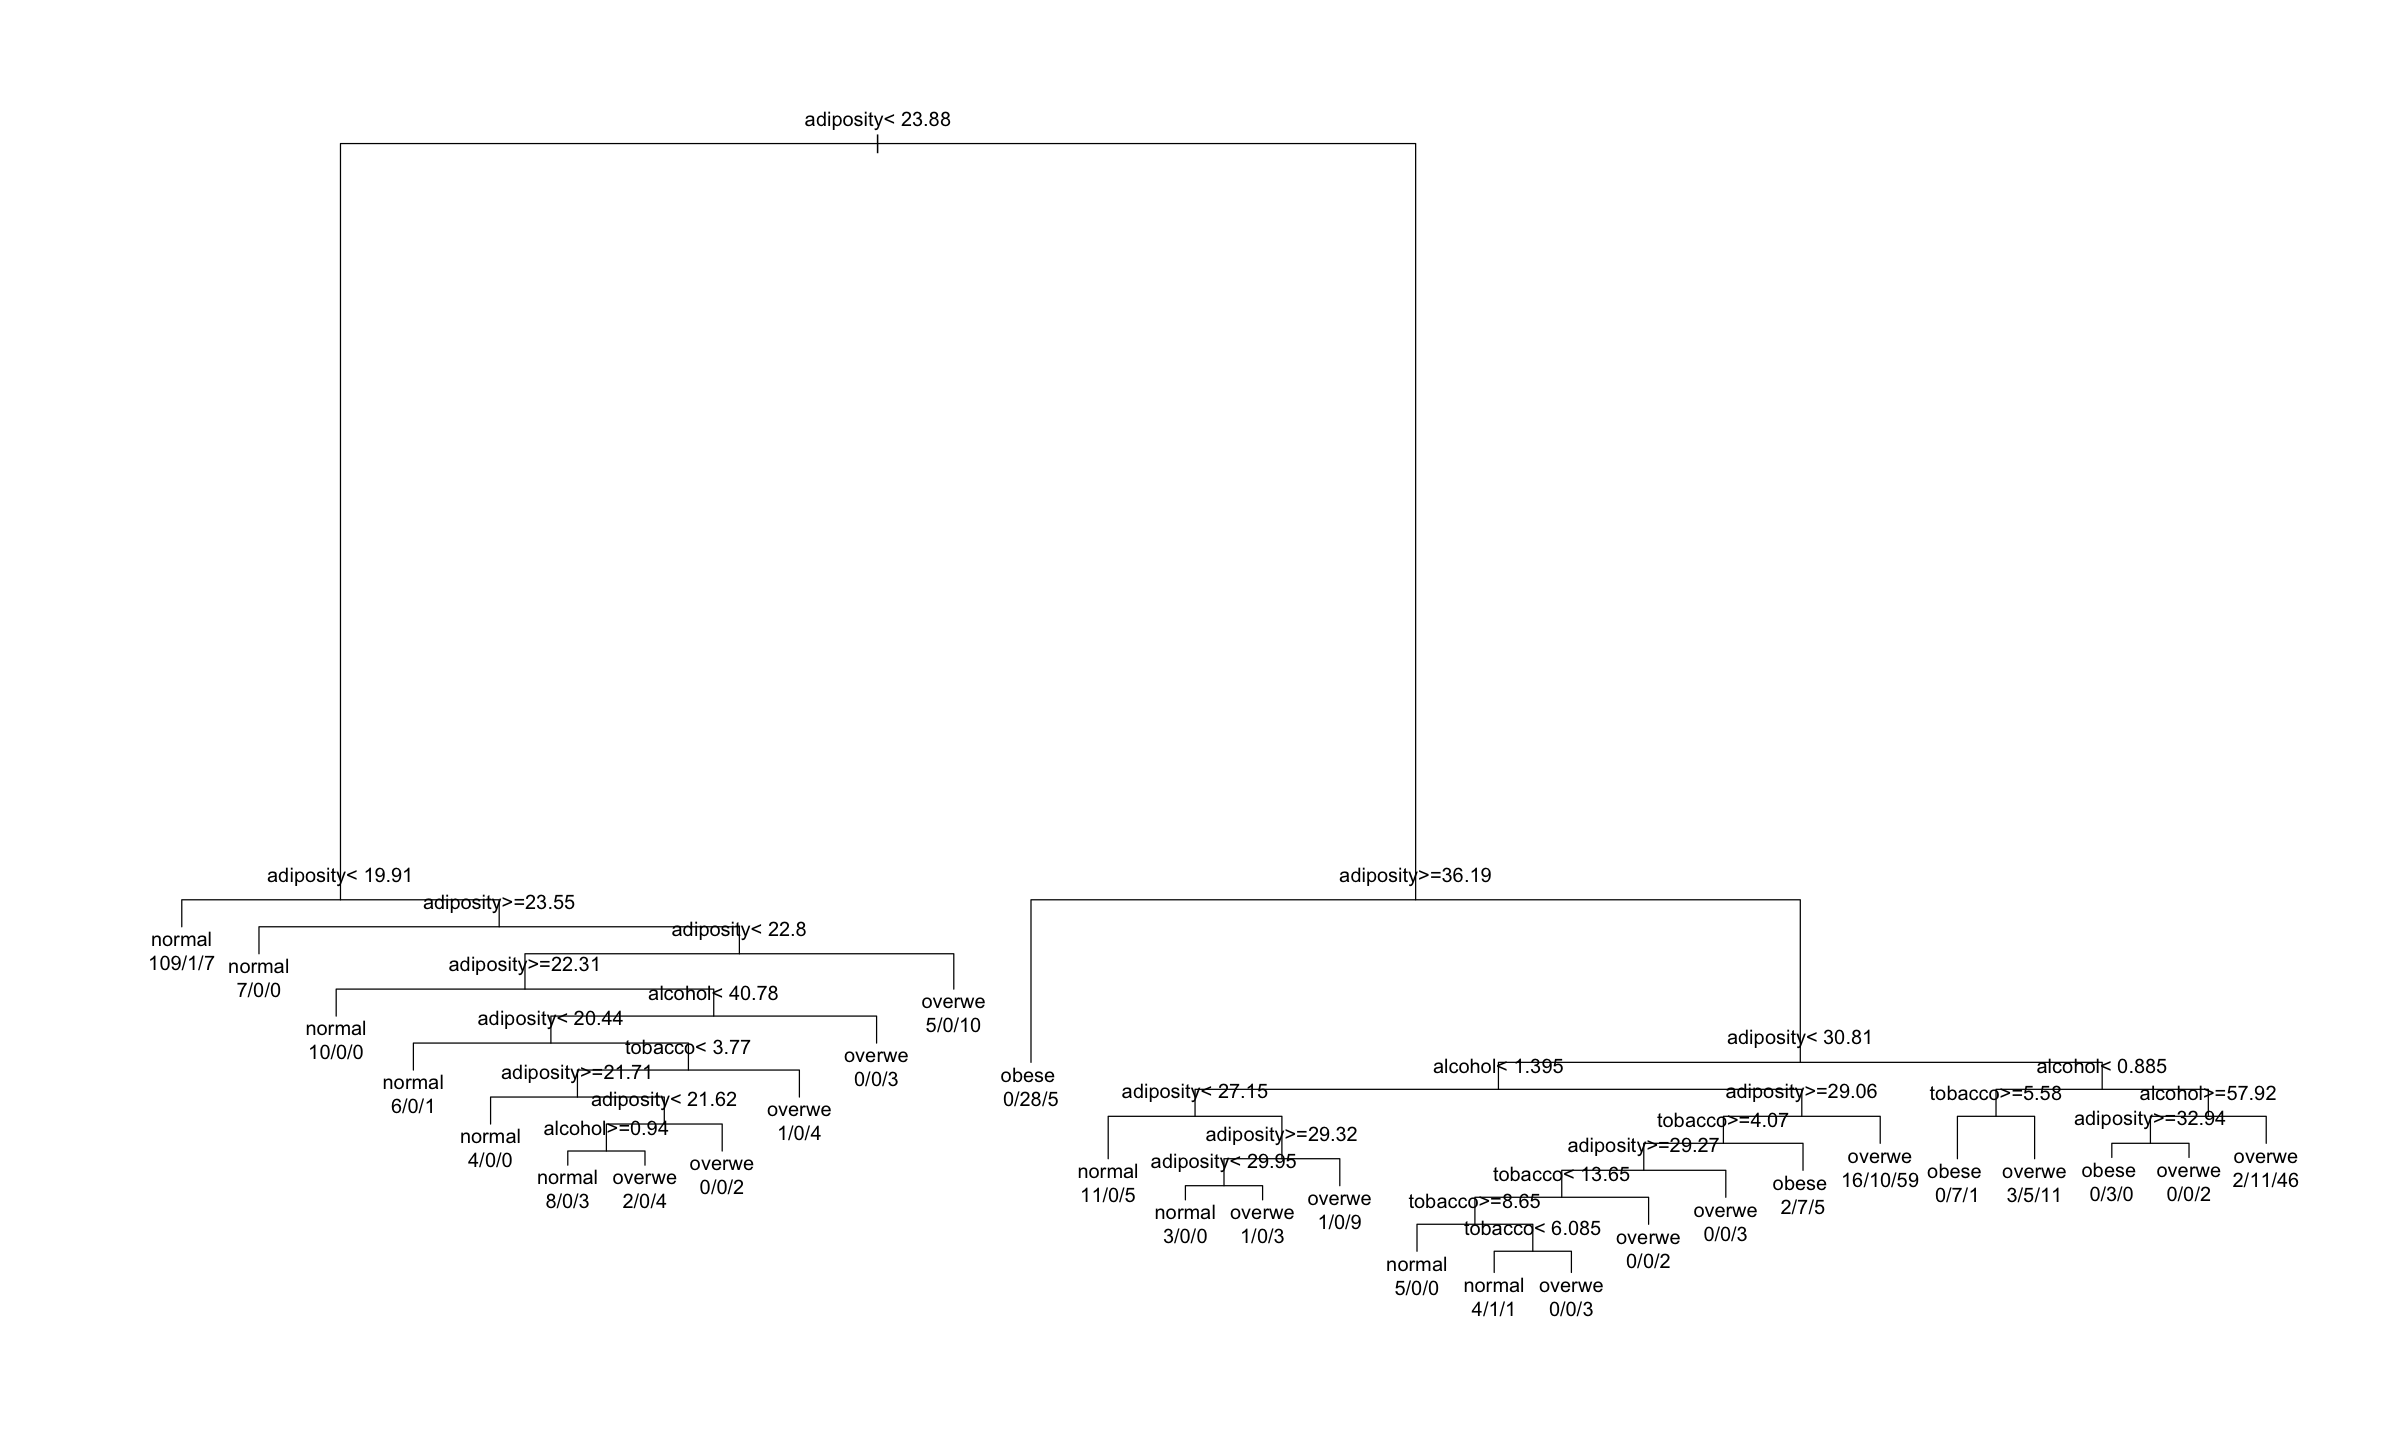

In [29]:
# stworzenie drzewa klasyfikacyjnego zaleznosci zmiennej bmi od zmiennych tobacco, alcohol oraz adiposity
drzewo_15_1 = rpart(bmi ~ tobacco + alcohol + adiposity, data = serce, cp = 0.005, minsplit = 5)
# narysowanie drzewa klasyfikacyjnego
plot(drzewo_15_1)
# dodanie tekstu do drzewa klasyfikacyjnego
text(drzewo_15_1, use.n = TRUE)

Współczynnik złożoności drzewa został dobrany tak, aby odpowiadał drzewu w punkcie $d)$.

#### a) Wybrać optymalną wartość współczynnika złożoności i wyznaczyć ponownie drzewo dla uzyskanej wartości współczynnika złożoności.

In [30]:
# zmiana wielkosci wykresow
options(repr.plot.width = 10, repr.plot.height = 10)

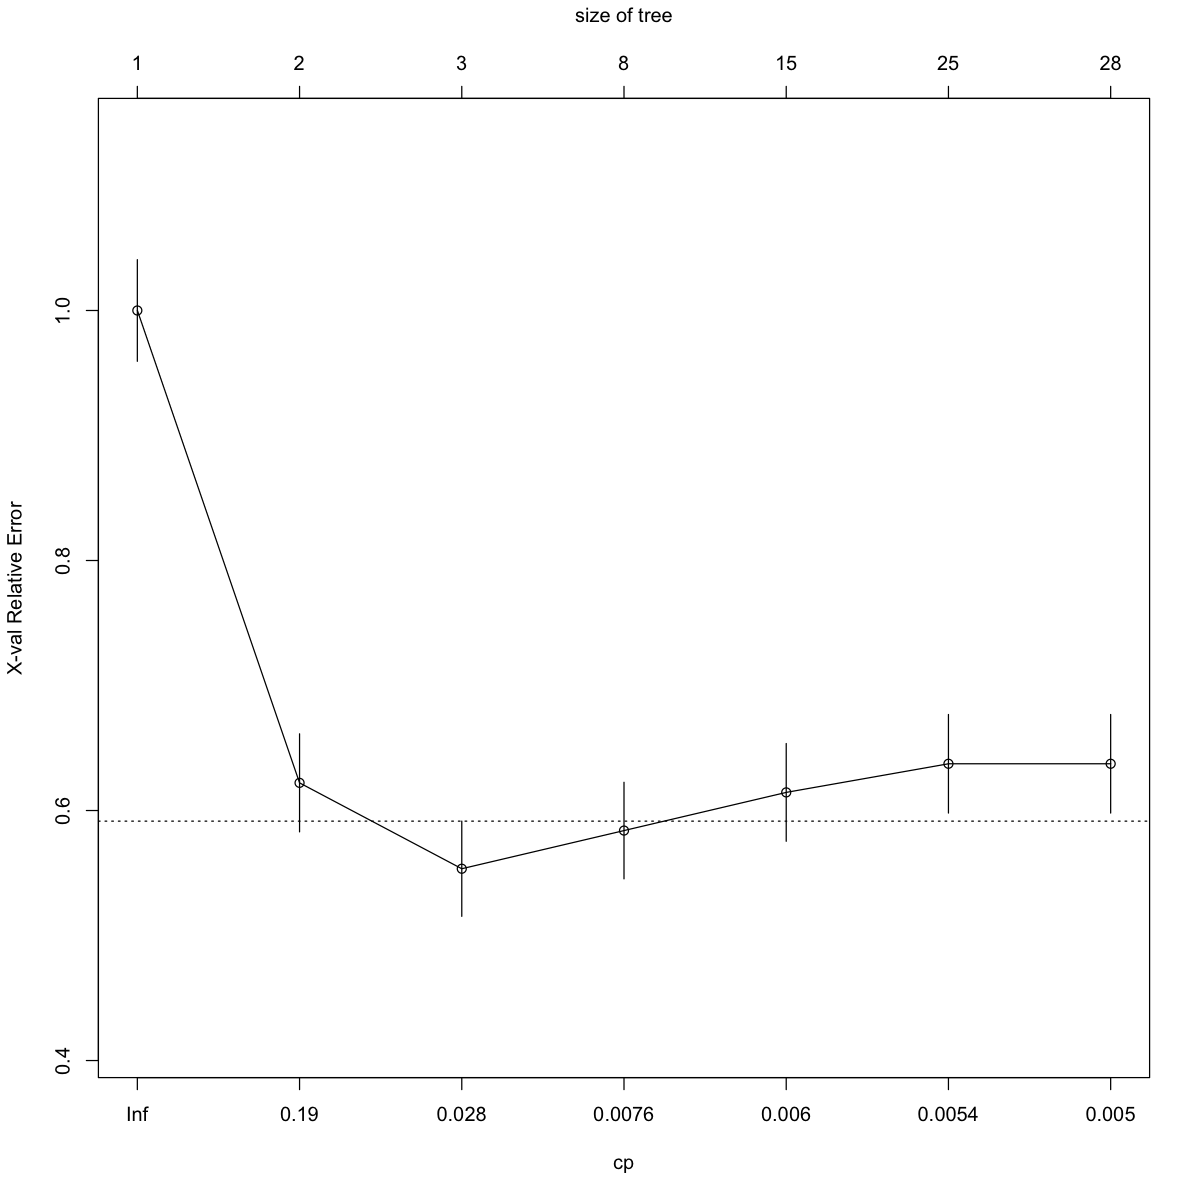

In [31]:
# wykres dla wspolczynnika zlozonosci
plotcp(drzewo_15_1)

Optymalna wartość współczynnika złożoności wynosi 0.028.

In [32]:
# zmiana wielkosci wykresow
options(repr.plot.width = 12, repr.plot.height = 12)

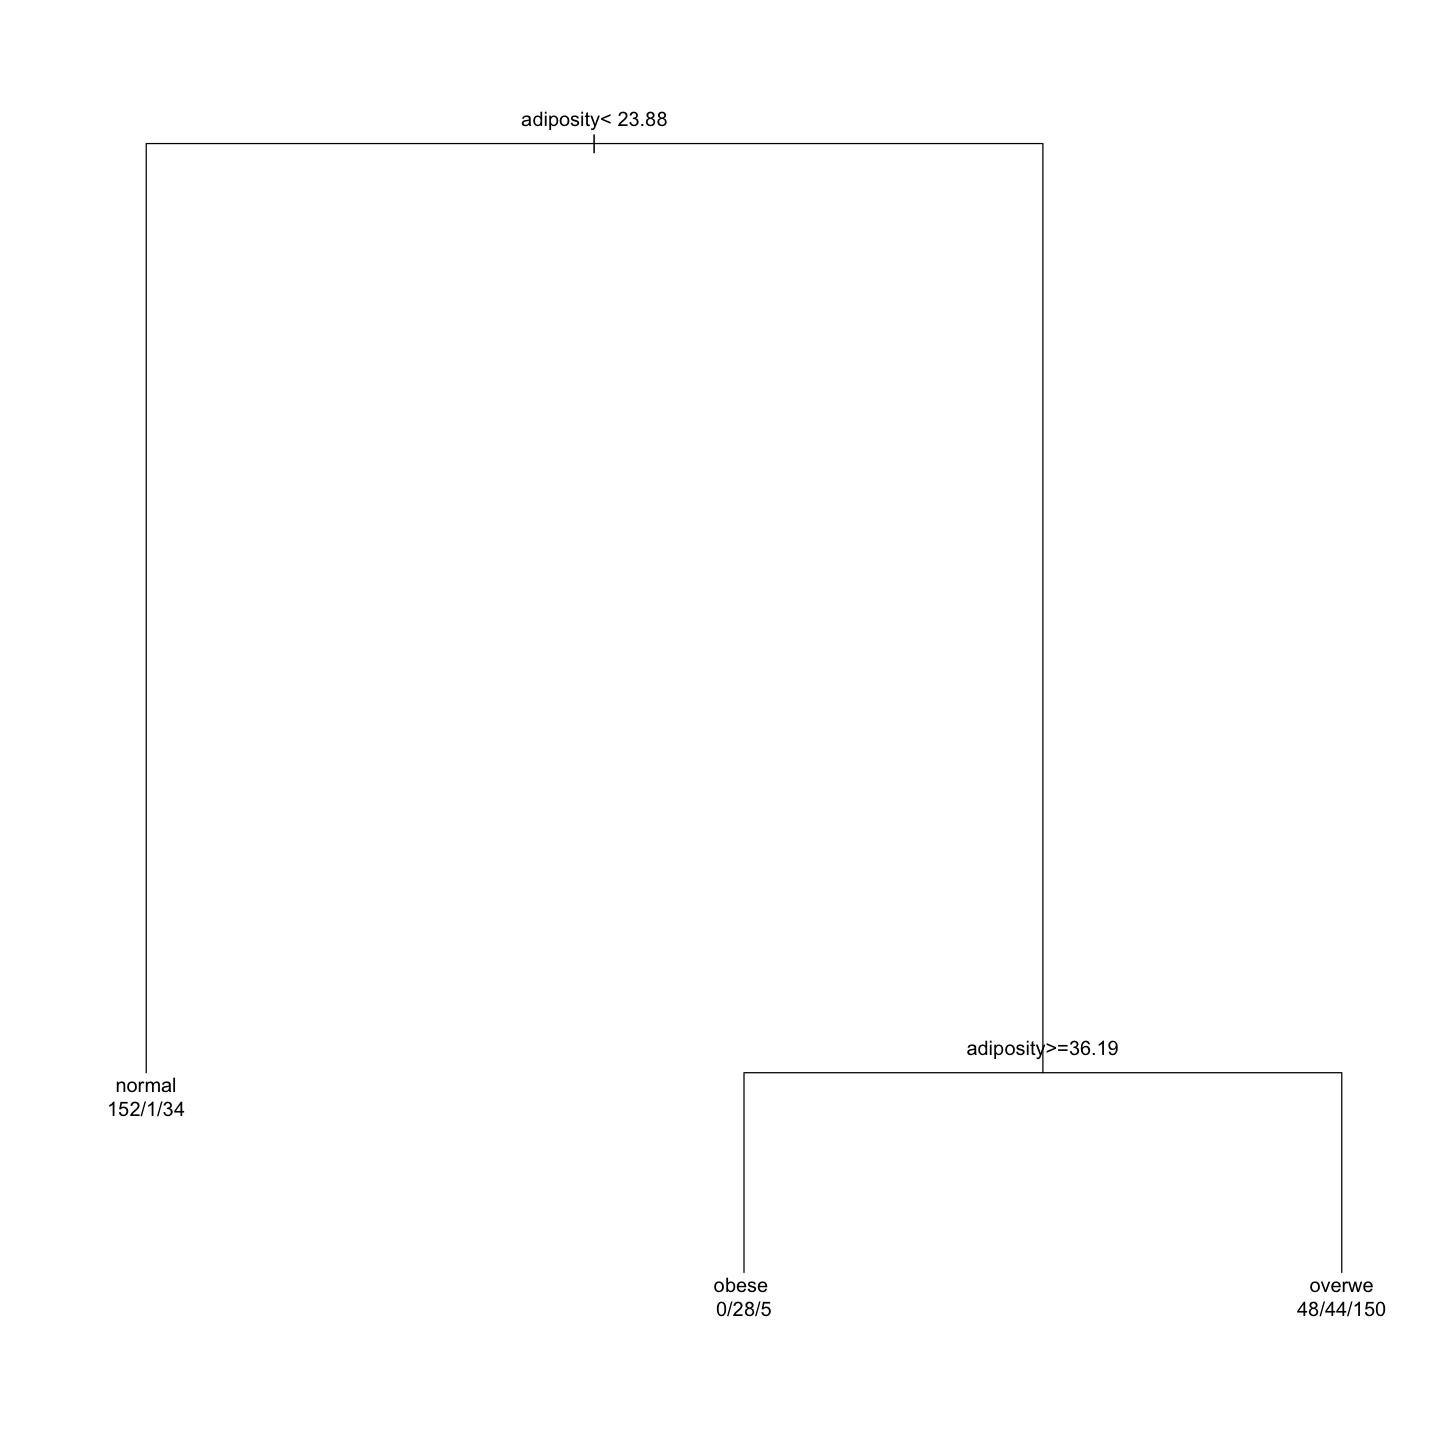

In [33]:
# obciecie stworzonego wczesniej drzewa klasyfikacyjnego do drzewa ze zmieniona wartoscia wspolczynnika zlozonosci
drzewo_15_2 = prune.rpart(drzewo_15_1, cp = 0.028)
# narysowanie drzewa
plot(drzewo_15_2)
# dodanie tekstu do drzewa
text(drzewo_15_2, use.n = TRUE)

#### b) Wybrać drzewo optymalne przy pomocy metody kroswalidacji.

In [34]:
# liczba obserwacji w zbiorze danych
liczba_obserwacji_15 = nrow(serce)
liczba_obserwacji_15

[1] 462

In [35]:
# stworzenie pustych wektorow do uzupelnienia
poprawnosc_kroswalidacja_15_1 = rep(0, liczba_obserwacji_15)
poprawnosc_kroswalidacja_15_2 = rep(0, liczba_obserwacji_15)

In [36]:
# sprawdzenie metody kroswalidacji dla wartosci wspolczynnika zlozonosci 0.005
for (i in 1:liczba_obserwacji_15){
# za kazdym powtorzeniem petli bierzemy dane bez jednej obserwacji
    serce_kroswalidacja_1 = serce[-i, ]
# okreslenie wyrzuconej obserwacji
    serce_obserwacja_1 = serce[i, ]
# stworzenie drzewa na podstawie metody kroswalidacji dla wyznaczonej wartosci wspolczynnika zlozonosci
    drzewo_kroswalidacja_15_1 = rpart(bmi ~ tobacco + alcohol + adiposity, data = serce, cp = 0.005, minsplit = 5)
# predykcja klasy wyrzuconej obserwacji na podstawie stworzonego drzewa
    predykcja_kroswalidacja_15_1 = predict(drzewo_kroswalidacja_15_1, newdata = serce_obserwacja_1, type = "class")
# jezeli predykcja nie jest identyczna jak oryginalna wartosc, to do wektora wpisujemy 1
    if (predykcja_kroswalidacja_15_1 != serce_obserwacja_1$bmi){
        poprawnosc_kroswalidacja_15_1[i] = 1
    }
}

In [37]:
# sprawdzenie metody kroswalidacji dla wartosci wspolczynnika zlozonosci 0.028
for (i in 1:liczba_obserwacji_15){
# za kazdym powtorzeniem petli bierzemy dane bez jednej obserwacji
    serce_kroswalidacja_2 = serce[-i, ]
# okreslenie wyrzuconej obserwacji
    serce_obserwacja_2 = serce[i, ]
# stworzenie drzewa na podstawie metody kroswalidacji dla wyznaczonej wartosci wspolczynnika zlozonosci
    drzewo_kroswalidacja_15_2 = rpart(bmi ~ tobacco + alcohol + adiposity, data = serce, cp = 0.028, minsplit = 5)
# predykcja klasy wyrzuconej obserwacji na podstawie stworzonego drzewa
    predykcja_kroswalidacja_15_2 = predict(drzewo_kroswalidacja_15_2, newdata = serce_obserwacja_2, type = "class")
# jezeli predykcja nie jest identyczna jak oryginalna wartosc, to do wektora wpisujemy 1
    if (predykcja_kroswalidacja_15_2 != serce_obserwacja_2$bmi){
        poprawnosc_kroswalidacja_15_2[i] = 1
    }
}

In [38]:
# wypisanie utworzonych wektorow
poprawnosc_kroswalidacja_15_1
poprawnosc_kroswalidacja_15_2

[1] 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[112] 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[149] 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0
[223] 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[260] 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0
[297] 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
[334] 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
[371] 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
[408] 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[445] 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1

[1] 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0
 [75] 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[149] 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0
[186] 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0
[223] 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
[260] 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0
[297] 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
[334] 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
[371] 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
[408] 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1
[445] 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1

#### c) Oszacować ułamek poprawnych klasyfikacji oraz błąd klasyfikacji na podstawie kroswalidacji.

In [39]:
# blad klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.005
blad_predykcji_drzewo_kroswalidacja_15_1 = sum(poprawnosc_kroswalidacja_15_1) / liczba_obserwacji_15 * 100
blad_predykcji_drzewo_kroswalidacja_15_1

[1] 19.26407

In [40]:
# blad klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.028
blad_predykcji_drzewo_kroswalidacja_15_2 = sum(poprawnosc_kroswalidacja_15_2) / liczba_obserwacji_15 * 100
blad_predykcji_drzewo_kroswalidacja_15_2

[1] 28.57143

In [41]:
# procent poprawnych klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.005
poprawna_predykcja_drzewo_kroswalidacja_15_1 = 100 - blad_predykcji_drzewo_kroswalidacja_15_1
poprawna_predykcja_drzewo_kroswalidacja_15_1

[1] 80.73593

In [42]:
# procent poprawnych klasyfikacji dla drzewa opartego o metode kroswalidacji dla wartosci wspolczynnika zlozonosci 0.028
poprawna_predykcja_drzewo_kroswalidacja_15_2 = 100 - blad_predykcji_drzewo_kroswalidacja_15_2
poprawna_predykcja_drzewo_kroswalidacja_15_2

[1] 71.42857

Błąd klasyfikacji dla obu drzew opartych o metodę kroswalidacji nie jest taki sam. Co ciekawe, znacznie mniejszy procent błędu (o ponad 9%), wynoszący ponad 19%, występuje dla współczynnika złożoności o wartości 0.005 niż dla optymalnej jego wartości.

#### d) Porównać wartości z podpunktu $c)$ dla drzewa ze współczynnikiem złożoności = 0.005. Które drzewo jest lepsze?

In [43]:
# predykcje klas na podstawie drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005
predykcja_drzewo_15_1 = predict(drzewo_15_1, type = "class")
predykcja_drzewo_15_1

1      2      3      4      5      6      7      8      9     10     11 
overwe normal overwe normal normal overwe normal overwe normal  obese overwe 
    12     13     14     15     16     17     18     19     20     21     22 
overwe normal normal  obese overwe normal overwe normal normal normal normal 
    23     24     25     26     27     28     29     30     31     32     33 
normal normal overwe overwe overwe overwe overwe normal overwe normal normal 
    34     35     36     37     38     39     40     41     42     43     44 
overwe normal normal normal normal normal overwe overwe normal overwe overwe 
    45     46     47     48     49     50     51     52     53     54     55 
 obese overwe overwe normal overwe normal  obese overwe normal overwe overwe 
    56     57     58     59     60     61     62     63     64     65     66 
normal overwe overwe overwe  obese overwe normal normal overwe normal normal 
    67     68     69     70     71     72     73     74     75     76     77 
normal normal normal normal normal overwe normal overwe overwe overwe normal 
    78     79     80     81     82     83     84     85     86     87     88 
 obese normal overwe overwe normal normal  obese normal  obese  obese normal 
    89     90     91     92     93     94     95     96     97     98     99 
overwe normal normal overwe normal normal normal  obese overwe overwe normal 
   100    101    102    103    104    105    106    107    108    109    110 
overwe normal normal normal overwe overwe normal overwe overwe normal overwe 
   111    112    113    114    115    116    117    118    119    120    121 
overwe overwe overwe overwe overwe overwe normal overwe overwe overwe normal 
   122    123    124    125    126    127    128    129    130    131    132 
overwe overwe overwe overwe overwe overwe overwe normal  obese normal normal 
   133    134    135    136    137    138    139    140    141    142    143 
normal overwe normal overwe normal normal overwe  obese overwe normal overwe 
   144    145    146    147    148    149    150    151    152    153    154 
overwe overwe normal normal overwe overwe overwe normal  obese overwe normal 
   155    156    157    158    159    160    161    162    163    164    165 
normal overwe normal normal normal normal  obese overwe normal overwe normal 
   166    167    168    169    170    171    172    173    174    175    176 
normal overwe normal overwe normal normal normal normal normal overwe normal 
   177    178    179    180    181    182    183    184    185    186    187 
normal normal  obese normal normal normal overwe  obese  obese normal normal 
   188    189    190    191    192    193    194    195    196    197    198 
overwe overwe overwe  obese normal normal overwe normal normal overwe normal 
   199    200    201    202    203    204    205    206    207    208    209 
normal overwe normal normal overwe  obese overwe overwe normal normal normal 
   210    211    212    213    214    215    216    217    218    219    220 
normal overwe overwe normal overwe normal overwe overwe  obese overwe normal 
   221    222    223    224    225    226    227    228    229    230    231 
 obese  obese overwe overwe overwe overwe normal normal overwe  obese normal 
   232    233    234    235    236    237    238    239    240    241    242 
normal overwe normal  obese  obese overwe normal overwe  obese  obese overwe 
   243    244    245    246    247    248    249    250    251    252    253 
 obese overwe normal normal normal overwe overwe normal normal normal normal 
   254    255    256    257    258    259    260    261    262    263    264 
normal normal normal normal overwe  obese overwe overwe overwe normal normal 
   265    266    267    268    269    270    271    272    273    274    275 
overwe overwe overwe overwe normal normal overwe overwe  obese overwe  obese 
   276    277    278    279    280    281    282    283    284    285    286 
normal normal overwe normal

In [44]:
# tabele predykcji dla drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005
tabela_predykcji_drzewo_15_1 = table(True = serce$bmi, Predicted = predykcja_drzewo_15_1)
tabela_predykcji_drzewo_15_1

        Predicted
True     normal obese overwe
  normal    167     2     31
  obese       2    45     26
  overwe     17    11    161

In [45]:
# blad predykcji dla drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005
blad_predykcji_drzewo_15_1 = (1 - (sum(diag(tabela_predykcji_drzewo_15_1))) / nrow(serce)) * 100
blad_predykcji_drzewo_15_1

[1] 19.26407

In [46]:
# blad predykcji dla drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005 opartego o metode kroswalidacji
blad_predykcji_drzewo_kroswalidacja_15_1

[1] 19.26407

Błąd klasyfikacji dla obu drzew - standardowego oraz opartego o metodę kroswalidacji z takim samym współczynnikiem złożoności wynoszącym 0.005 jest identyczny.

#### e) Do której z klas należałby pacjent, który spożył 5.5 kg tytoniu, 51.5 jednostek alkoholu oraz otyłością wynoszącą 15.44 jednostek?

In [47]:
# predykcja do klasy pacjenta, ktory spozyl 5.5 kg tytoniu, 51.5 jednostek alkoholu i ma otylosc mierzona jako 15.44 jednostek na podstawie drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.028
predykcja_obserwacja_15 = predict(drzewo_15_1, newdata = data.frame(tobacco = 5.5, alcohol = 51.5, adiposity = 15.44), type = "class")
predykcja_obserwacja_15

1 
normal 
Levels: normal obese overwe

Pacjent o opisanych parametrach należałby do klasy $normal$.